In [10]:
!which python

/home/sh4d0w074/anaconda3/envs/iris-course/bin/python


In [11]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 

In [12]:
# Standard Imports
import os

# Third Party Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

# local imports

In [13]:
sns.set()

# Load data
Load the Iris flower dataset using scikit-learn's built in datasets

In [14]:
data = datasets.load_iris()

In [15]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [16]:
print(data["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [17]:
data["data"][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [18]:
data["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [19]:
data["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## What problem am I solving?
Trying to use attributes of flowers to predict the species. Specifically, using sepal length, width and petal length and width to predict if an Iris flower is of type _setosa, type_versicolor or type_virginica. This is a multiclass classification problem. 

# Create a pandas dataframe from the data
Could do full analysis using numpy, but using pandas to make it simpler at the start

In [21]:
df = pd.DataFrame(data["data"], columns=data["feature_names"])

In [22]:
df["target"] = data["target"]

In [23]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Basic descriptive statistics

In [24]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Distributions of features and target

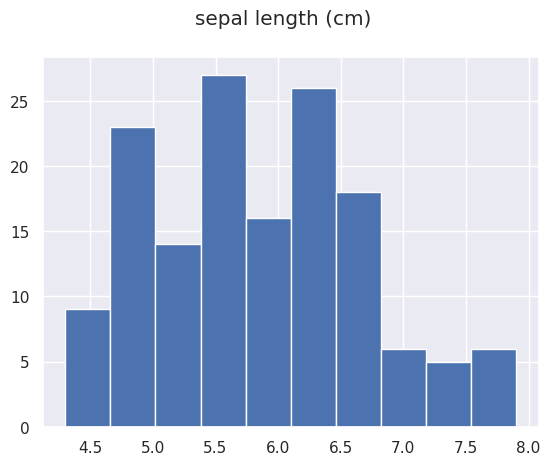

In [25]:
col = "sepal length (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

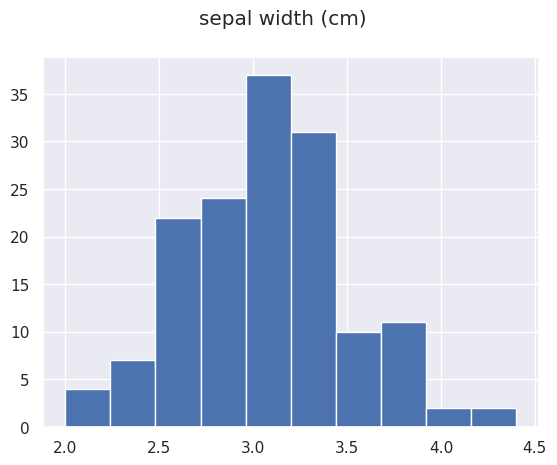

In [26]:
col = "sepal width (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

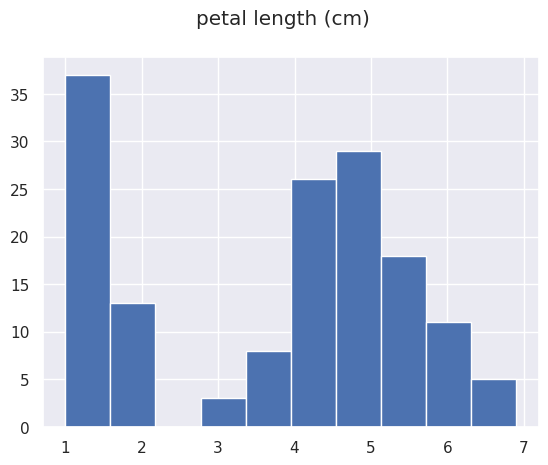

In [27]:
col = "petal length (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

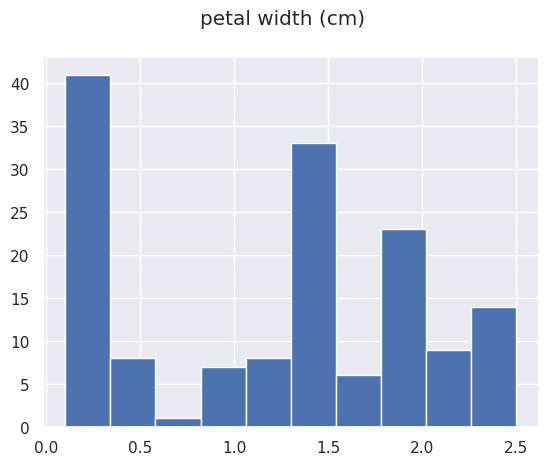

In [28]:
col = "petal width (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

# Relationship of data features with the target

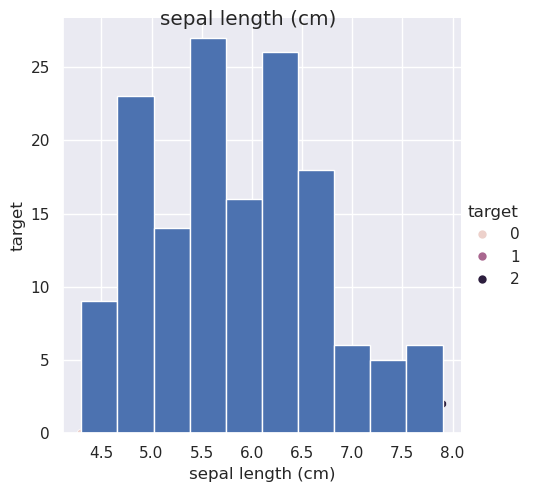

In [29]:
col = "sepal length (cm)"
sns.relplot(x=col, y="target", hue="target", data=df)
df[col].hist()
plt.suptitle(col)
plt.show()

In [30]:
data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [31]:
# create new column with the species name
df["target_name"] = df["target"].map({0: "setosa", 1: "versicolor", 2: "virginica"})

In [32]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


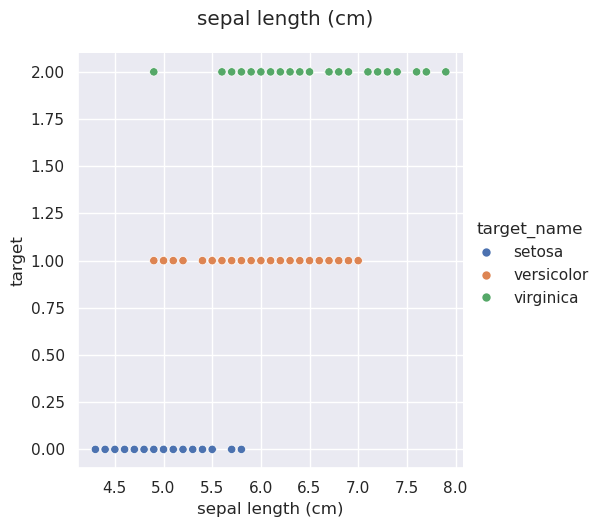

In [33]:
col = "sepal length (cm)"
sns.relplot(x=col, y="target", hue="target_name", data=df)
plt.suptitle(col, y=1.05)
plt.show()

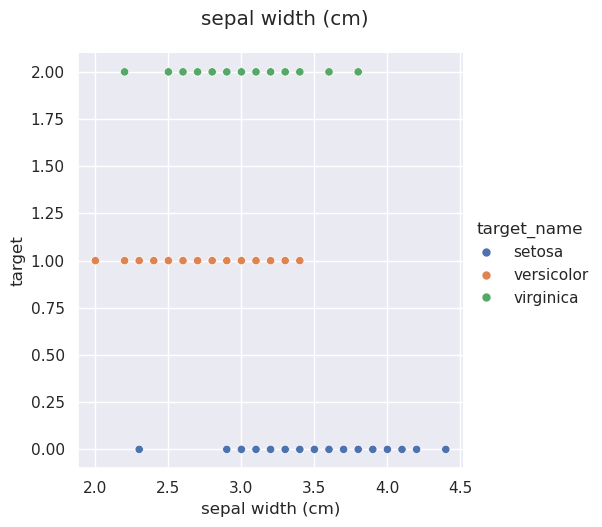

In [34]:
col = "sepal width (cm)"
sns.relplot(x=col, y="target", hue="target_name", data=df)
plt.suptitle(col, y=1.05)
plt.show()

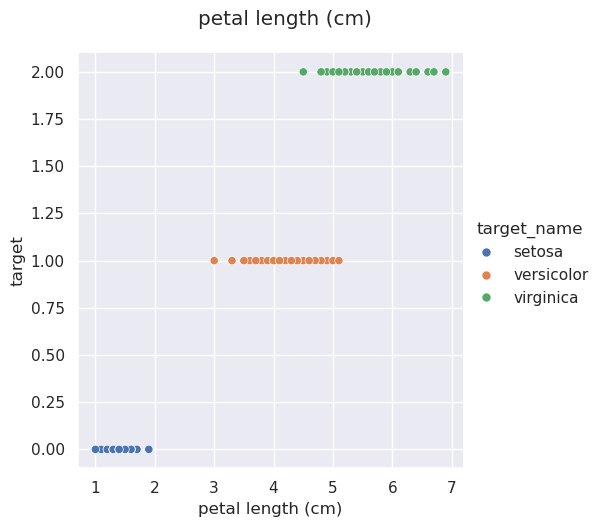

In [35]:
col = "petal length (cm)"
sns.relplot(x=col, y="target", hue="target_name", data=df)
plt.suptitle(col, y=1.05)
plt.show()

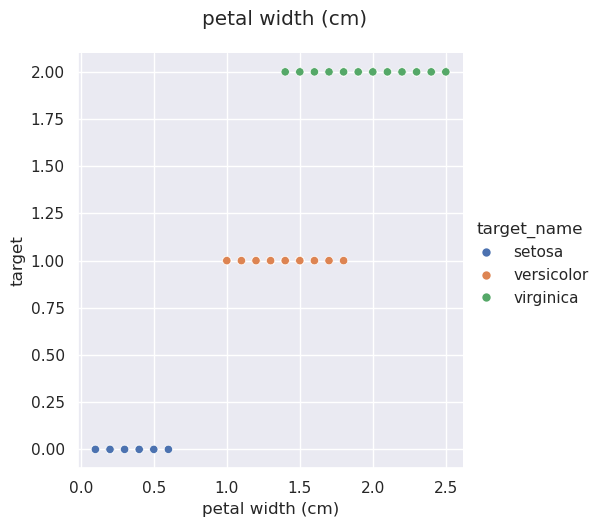

In [36]:
col = "petal width (cm)"
sns.relplot(x=col, y="target", hue="target_name", data=df)
plt.suptitle(col, y=1.05)
plt.show()

# Exploratory Data Analysis - Pairplots

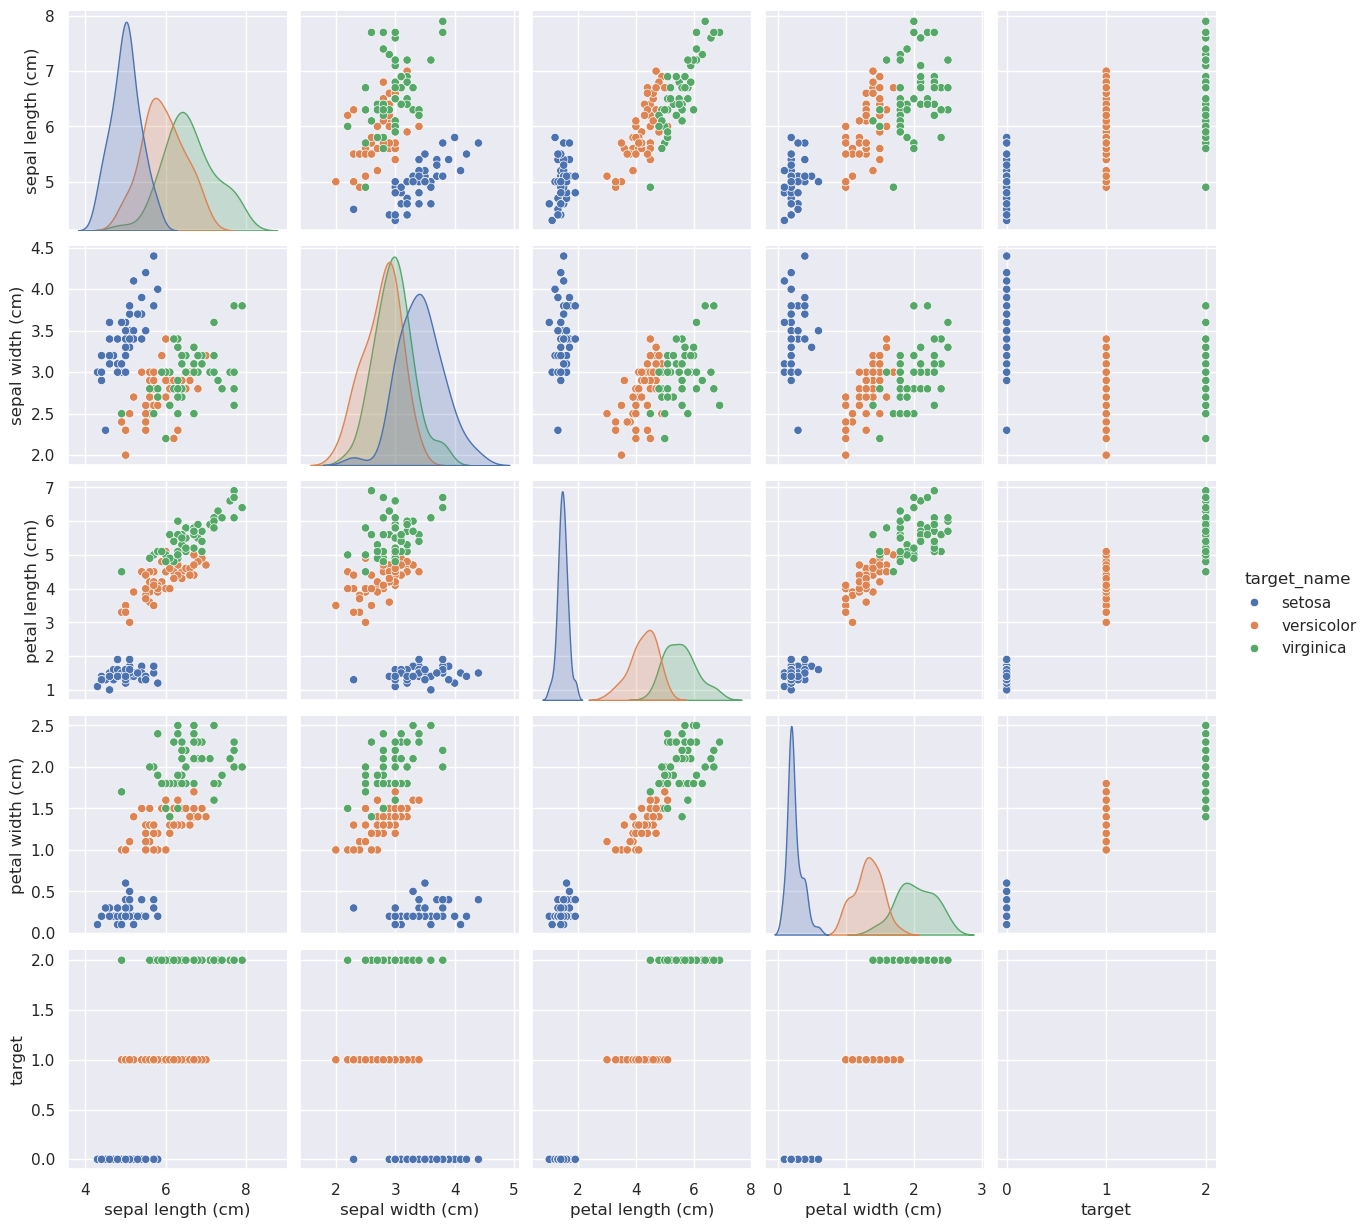

In [37]:
sns.pairplot(df, hue="target_name")

# Train test split
Always evaluate your final model on a test set that hasnt been used at all in the training process. This is why I split a test set here.

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
df_train, df_test = train_test_split(df, test_size=0.25)

In [40]:
df_train.shape

(112, 6)

In [41]:
df_test.shape

(38, 6)

In [42]:
df_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
115,6.4,3.2,5.3,2.3,2,virginica
49,5.0,3.3,1.4,0.2,0,setosa
104,6.5,3.0,5.8,2.2,2,virginica
44,5.1,3.8,1.9,0.4,0,setosa
80,5.5,2.4,3.8,1.1,1,versicolor


# Prepare the data for modelling
This involves splitting the data back out into plain NumPy arrays.

In [43]:
x_train = df_train.drop(columns=["target", "target_name"]).values
y_train = df_train["target"].values

# Modeling- What is our baseline?

What is the simplest model we can think of? 

In this case, if the baseline model is just randomly guessing the species of flower,  or guessing a single species for every data point, a model accuracy of 0.33 / 33% is expected, since there are 3 different classes that are evenly balanced. 

So models should at least beat 33% accuracy.



# Modeling - Simple manual model

This includes manually looking at the data and deciding some cutoff points for classification

In [44]:
data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [45]:
def single_feature_prediction(petal_length):
    """Predicts the Iris species given the petal length."""
    if petal_length < 2.5:
        return 0
    elif petal_length < 4.6:
        return 1
    else:
        return 2

In [46]:
x_train[:, 2]

array([5.3, 1.4, 5.8, 1.9, 3.8, 1.6, 6.1, 5.5, 4.2, 1.7, 5.3, 5.9, 4. ,
       4.6, 3.3, 1.4, 6.3, 4.4, 4.4, 5.5, 6. , 4.4, 5. , 4.3, 1.5, 1.5,
       4.6, 3.7, 1.4, 1.6, 1.2, 1.5, 6.7, 4.8, 5.1, 1.5, 1.7, 1.6, 4.9,
       4. , 5.6, 4.5, 4.1, 4.5, 1.5, 1.7, 6.6, 5.1, 1.2, 5. , 5.1, 5.1,
       1.6, 1.6, 1.3, 4.5, 1.3, 4. , 5.7, 1.4, 6.1, 5.2, 3.6, 1.3, 5.6,
       5.5, 1.1, 3.5, 5.2, 3.9, 6. , 1.3, 1.5, 6.7, 1.5, 3.9, 3.5, 3. ,
       5.1, 4.5, 6.4, 1.6, 4.4, 1.4, 1. , 4.1, 1.3, 1.4, 4.2, 4.3, 4.6,
       1.4, 1.5, 6.9, 6.1, 4.8, 4.2, 5.1, 1.6, 4.7, 4.7, 4.8, 5.6, 4.5,
       1.5, 1.5, 5. , 5.1, 1.5, 4.5, 5.6, 4.5])

In [47]:
manual_y_predictions = np.array([single_feature_prediction(val) for val in x_train[:, 2]])

In [48]:
manual_model_accuracy = np.mean(manual_y_predictions == y_train)

In [49]:
print(f"Manual model accuracy: {manual_model_accuracy*100:.2f}%")

Manual model accuracy: 91.96%


# Modeling - Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

### Using a validation set to evaluate model

In [51]:
model = LogisticRegression(max_iter=200)

In [52]:
# xt stands for "x_train" and xv stands for "x_validation"
xt, xv, yt, yv = train_test_split(x_train, y_train, test_size=0.25) 

In [53]:
model.fit(xt, yt)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [54]:
y_pred = model.predict(xv)

In [55]:
np.mean(y_pred == yv)

np.float64(0.9642857142857143)

In [56]:
model.score(xv, yv)

0.9642857142857143

### Using cross-validation to evaluate my model

In [57]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [58]:
model = LogisticRegression(max_iter=200)

In [59]:
accuracies = cross_val_score(model, x_train, y_train, cv=5, scoring="accuracy")

In [60]:
np.mean(accuracies)

np.float64(0.9644268774703557)

# Where did I misclassify points?

In [61]:
y_pred = cross_val_predict(model, x_train, y_train, cv=5)

In [62]:
predicted_correctly_mask = y_pred == y_train

In [63]:
predicted_correctly_mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False])

In [64]:
not_predicted_correctly = ~predicted_correctly_mask

In [65]:
x_train[not_predicted_correctly]

array([[6. , 2.2, 5. , 1.5],
       [6. , 2.7, 5.1, 1.6],
       [6.7, 3. , 5. , 1.7],
       [4.9, 2.5, 4.5, 1.7]])

In [66]:
df_predictions = df_train.copy()

In [67]:
df_predictions["correct_prediction"] = predicted_correctly_mask

In [68]:
df_predictions["prediction"] = y_pred

In [69]:
df_predictions["prediction_label"] = df_predictions["prediction"].map({0: "setosa", 1: "versicolor", 2: "virginica"})

In [70]:
df_predictions.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,correct_prediction,prediction,prediction_label
115,6.4,3.2,5.3,2.3,2,virginica,True,2,virginica
49,5.0,3.3,1.4,0.2,0,setosa,True,0,setosa
104,6.5,3.0,5.8,2.2,2,virginica,True,2,virginica
44,5.1,3.8,1.9,0.4,0,setosa,True,0,setosa
80,5.5,2.4,3.8,1.1,1,versicolor,True,1,versicolor


<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

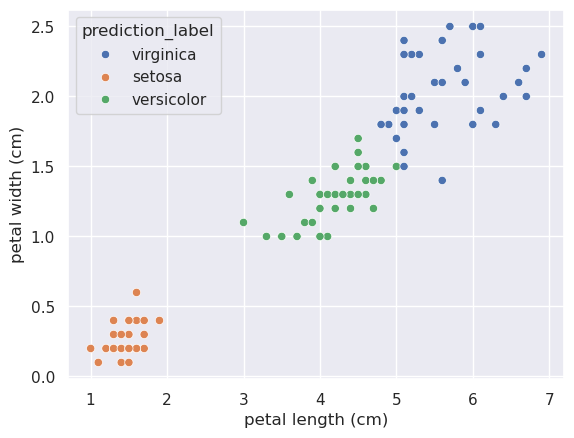

In [71]:
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="prediction_label", data=df_predictions)

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

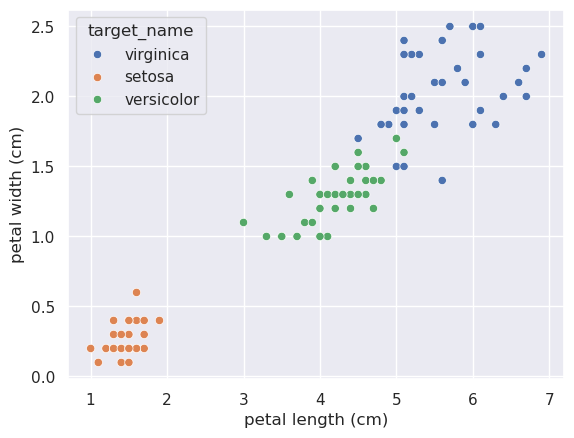

In [72]:
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="target_name", data=df_predictions)

In [73]:
def plot_incorrect_predictions(df_predictions, x_axis_feature, y_axis_feature):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs=axs.flatten()
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue="prediction_label", data=df_predictions, ax=axs[0])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue="target_name", data=df_predictions, ax=axs[1])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue="correct_prediction", data=df_predictions, ax=axs[2])
    axs[3].set_visible(False)
    
    plt.show()

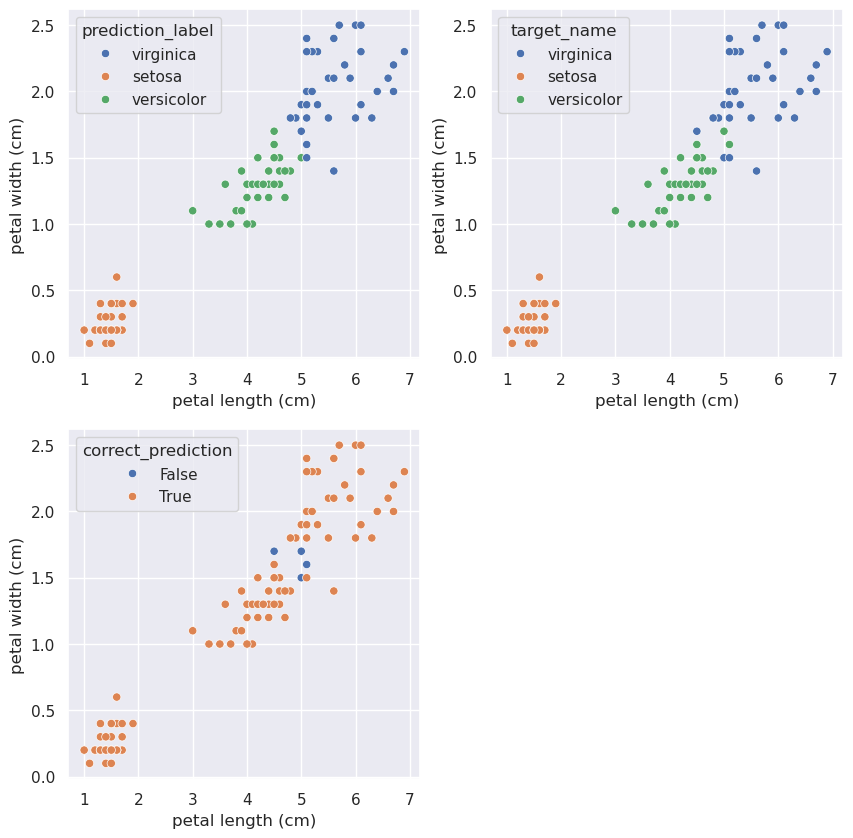

In [74]:
plot_incorrect_predictions(df_predictions, "petal length (cm)", "petal width (cm)")

# Model Tuning

Model tuning is trying to determine the parameters of the model (aka "hyperparameters") that maximise the model performance.

In [116]:
for reg_param in (1, 1.3, 1.8, 2, 2.1, 2.2, 2.4, 2.5, 5, 10, 100):
    print(reg_param)
    model = LogisticRegression(max_iter=200, C=reg_param)
    accuracies = cross_val_score(model, x_train, y_train, cv=5, scoring="accuracy")
    print(f"Accuracy: {np.mean(accuracies)*100:.2f}%")

1
Accuracy: 96.44%
1.3
Accuracy: 97.31%
1.8
Accuracy: 97.31%
2
Accuracy: 97.31%
2.1
Accuracy: 97.31%
2.2
Accuracy: 97.31%
2.4
Accuracy: 97.31%
2.5
Accuracy: 97.31%
5
Accuracy: 96.40%
10
Accuracy: 96.40%
100
Accuracy: 96.40%


# Final Model

In [ ]:
model = LogisticRegression(max_iter=200, C=2)

# How well does model do on the Test Set?

In [117]:
x_test = df_test.drop(columns=["target", "target_name"]).values
y_test = df_test["target"].values

### Train final model using full Training Dataset

In [121]:
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,100
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [122]:
y_test_pred = model.predict(x_test)

In [126]:
test_set_correctly_classified = y_test_pred == y_test
test_set_accuracy = np.mean(test_set_correctly_classified)

In [127]:
print(f"Test set accuracy: {test_set_accuracy*100:.2f}%")

Test set accuracy: 97.37%


In [128]:
df_predictions_test = df_test.copy()
df_predictions_test["correct_prediction"] = test_set_correctly_classified
df_predictions_test["prediction"] = y_test_pred
df_predictions_test["prediction_label"] = df_predictions_test["prediction"].map({0: "setosa", 1: "versicolor", 2: "virginica"})

In [130]:
df_predictions_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,correct_prediction,prediction,prediction_label
71,6.1,2.8,4.0,1.3,1,versicolor,True,1,versicolor
139,6.9,3.1,5.4,2.1,2,virginica,True,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica,True,2,virginica
28,5.2,3.4,1.4,0.2,0,setosa,True,0,setosa
68,6.2,2.2,4.5,1.5,1,versicolor,True,1,versicolor


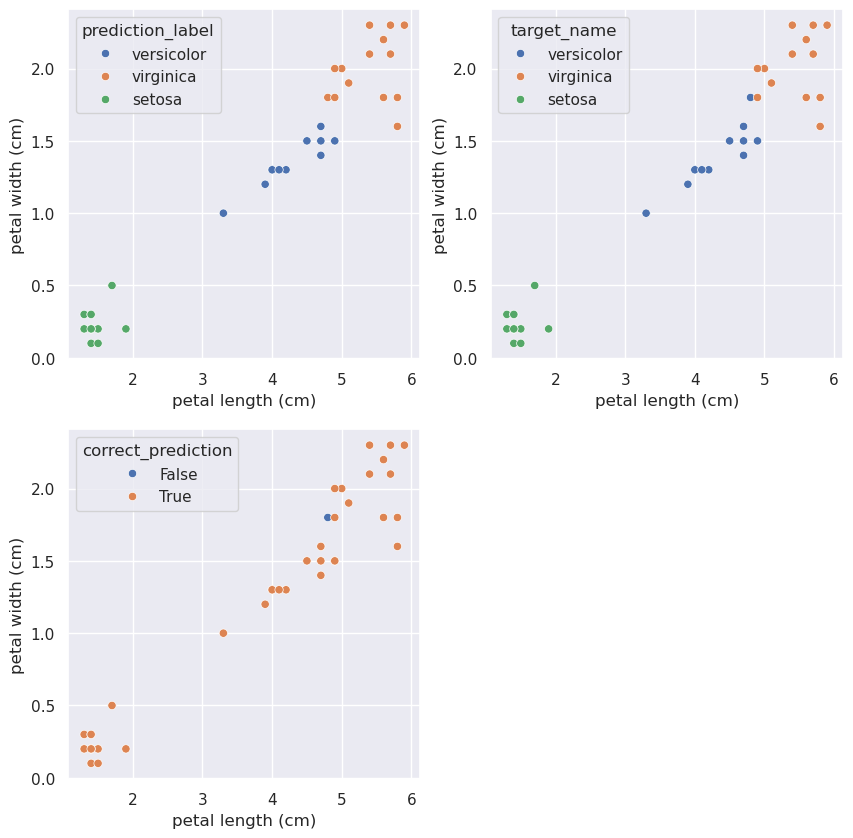

In [131]:
plot_incorrect_predictions(df_predictions_test, x_axis_feature="petal length (cm)", y_axis_feature="petal width (cm)")

# In Conclusion

In conclusion, I achieved a 97% accuracy on the test dataset using a Logistic Regression model with these model parameters: 

```
penalty 	'l2'
dual 	False
tol 	0.0001
C 	2
fit_intercept 	True
intercept_scaling 	1
class_weight 	None
random_state 	None
solver 	'lbfgs'
max_iter 	200
multi_class 	'deprecated'
verbose 	0
warm_start 	False
n_jobs 	None
l1_ratio 	None
```

